## 10장

### 10.1.3 퍼셉트론

In [1]:
# 파이썬 ≥3.5 필수
import sys
assert sys.version_info >= (3, 5)

# 사이킷런 ≥0.20 필수
import sklearn
assert sklearn.__version__ >= "0.20"

# 텐서플로 ≥2.0 필수
import tensorflow as tf
assert tf.__version__ >= "2.0"

# 공통 모듈 임포트
import numpy as np
import os

# 노트북 실행 결과를 동일하게 유지하기 위해
np.random.seed(42)

# 깔끔한 그래프 출력을 위해
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그림을 저장할 위치
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int8)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [3]:
y_pred

array([1], dtype=int8)

In [4]:
per_clf.coef_

array([[-1.4, -2.2]])

In [5]:
per_clf.intercept_

array([4.])

(0.0, 5.0, 0.0, 2.0)

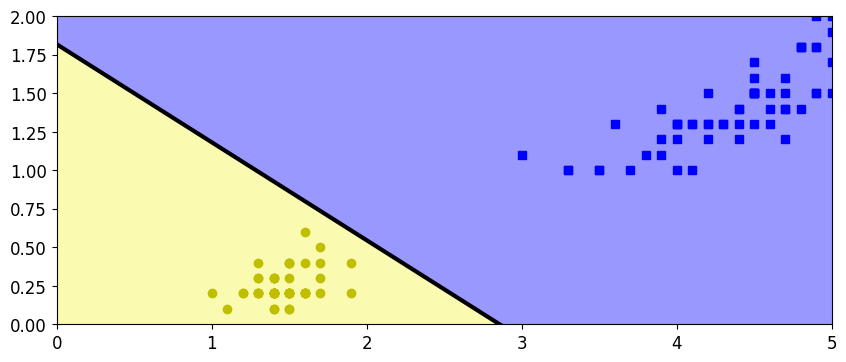

In [6]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
    np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
    np.linspace(axes[2], axes[3], 200).reshape(-1, 1)
)
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], 'bs', label='Not Iris-Setosa')
plt.plot(X[y==1, 0], X[y==1, 1], 'yo', label='Iris-Setosa')

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], 'k-', linewidth=3)

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.axis(axes)

In [7]:
x0.ravel()

array([0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
       5.        ])

In [8]:
x0.shape

(200, 500)

In [9]:
x0, x1

(array([[0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ],
        [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ],
        [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ],
        ...,
        [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ],
        [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ],
        [0.        , 0.01002004, 0.02004008, ..., 4.97995992, 4.98997996,
         5.        ]]),
 array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.01005025, 0.01005025, 0.01005025, ..., 0.01005025, 0.01005025,
         0.01005025],
        [0.0201005 , 0.0201005 , 0.0201005 , ..., 0.0201005 , 0.0201005 ,
         0.0201005 ],
        ...,
        [1.9798995 , 1.9798995 , 1.9798995 , ..., 1.9798995 , 1.9798995 ,
         1.9798995 ],
        [1.9

In [10]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps)) / (2 * eps)

(-5.0, 5.0, -1.2, 1.2)

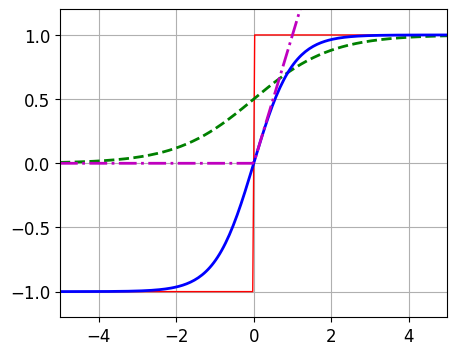

In [11]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(z, np.sign(z), 'r-', linewidth=1, label='Step')
plt.plot(z, sigmoid(z), 'g--', linewidth=2, label='Sigmoid')
plt.plot(z, np.tanh(z), 'b-', linewidth=2, label='Tanh')
plt.plot(z, relu(z), 'm-.', linewidth=2, label='ReLU')
plt.grid(True)
plt.axis([-5, 5, -1.2, 1.2])

In [12]:
import tensorflow as tf
from tensorflow import keras

In [13]:
tf.__version__

'2.13.0'

In [14]:
# keras.__version__

In [15]:
fashion_mnist = keras.datasets.fashion_mnist

In [16]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [17]:
X_train_full.shape

(60000, 28, 28)

In [18]:
X_train_full.dtype

dtype('uint8')

In [19]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

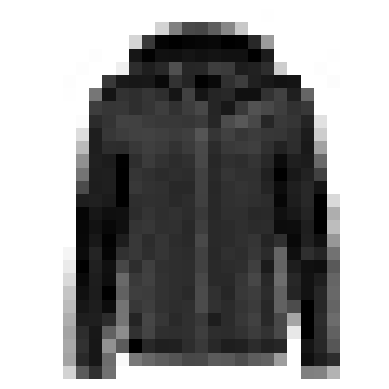

In [20]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [21]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [22]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [23]:
class_names[y_train[0]]

'Coat'

In [24]:
X_valid.shape

(5000, 28, 28)

In [25]:
X_test.shape

(10000, 28, 28)

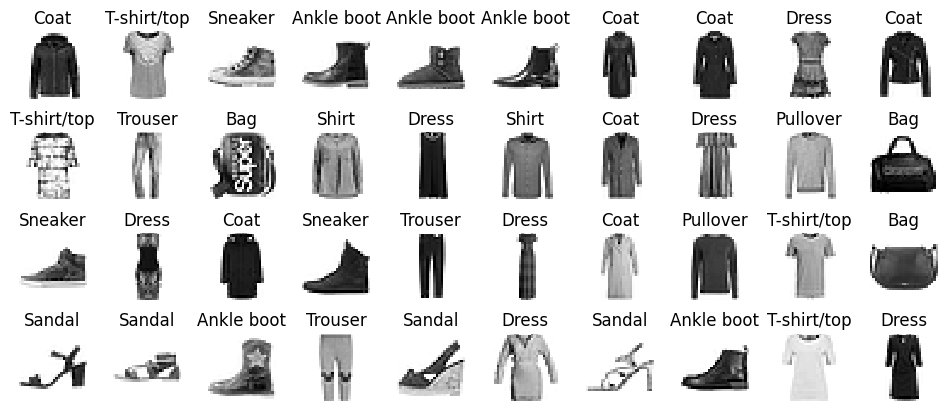

In [26]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [27]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

2023-08-14 19:59:47.072108: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-08-14 19:59:47.072139: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2023-08-14 19:59:47.072146: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2023-08-14 19:59:47.072225: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-14 19:59:47.072411: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [28]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [29]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [30]:
model.layers

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [32]:
keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [33]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [34]:
model.get_layer(hidden1.name) is hidden1

True

In [35]:
weights, biases = hidden1.get_weights()

In [36]:
weights

array([[-0.07259257, -0.03664075,  0.0215423 , ...,  0.05361241,
        -0.04676018, -0.01087046],
       [-0.00958293,  0.03229875,  0.02597237, ...,  0.05820753,
        -0.01299812,  0.02412219],
       [-0.01251125,  0.00884116,  0.0453977 , ..., -0.02089503,
         0.02246591, -0.05577289],
       ...,
       [-0.01985487, -0.05046893, -0.04007785, ..., -0.02747773,
         0.00804346, -0.06782838],
       [-0.0460097 , -0.03994304,  0.04091088, ...,  0.04580024,
         0.0048752 , -0.06151172],
       [-0.03505805,  0.02055429,  0.04745135, ...,  0.05615339,
        -0.04569518, -0.04924271]], dtype=float32)

In [37]:
weights.shape

(784, 300)

In [38]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [39]:
biases.shape

(300,)

In [40]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])

In [41]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
   1/1719 [..............................] - ETA: 9:01 - loss: 2.8068 - sparse_categorical_accuracy: 0.0625

2023-08-14 19:59:47.795903: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - ETA: 0s - loss: 0.7096 - sparse_categorical_accuracy: 0.7584

2023-08-14 19:59:59.651338: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1719/1719 [==============================] - 13s 7ms/step - loss: 0.7096 - sparse_categorical_accuracy: 0.7584 - val_loss: 0.5444 - val_sparse_categorical_accuracy: 0.8140
Epoch 2/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.5107 - sparse_categorical_accuracy: 0.8208 - val_loss: 0.4685 - val_sparse_categorical_accuracy: 0.8368
Epoch 3/30
1719/1719 [==============================] - 13s 7ms/step - loss: 0.4752 - sparse_categorical_accuracy: 0.8334 - val_loss: 0.6097 - val_sparse_categorical_accuracy: 0.7770
Epoch 4/30
 407/1719 [======>.......................] - ETA: 9s - loss: 0.4678 - sparse_categorical_accuracy: 0.8368

KeyboardInterrupt: 

In [ ]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

(0.0, 1.0)

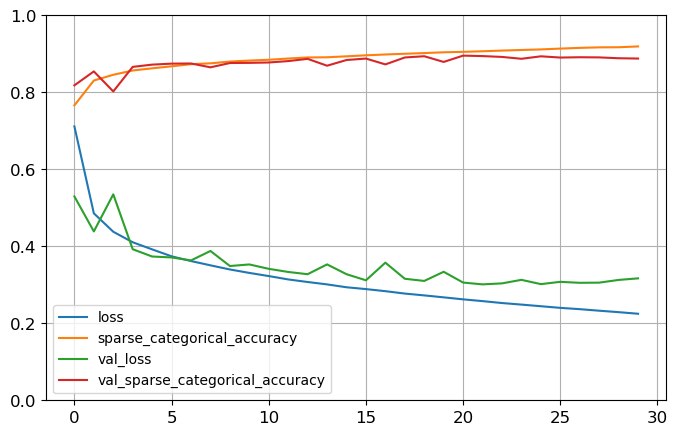

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 549us/step - loss: 0.3476 - sparse_categorical_accuracy: 0.8808


[0.3476172983646393, 0.8808000087738037]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 38ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.03, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [ ]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 12ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

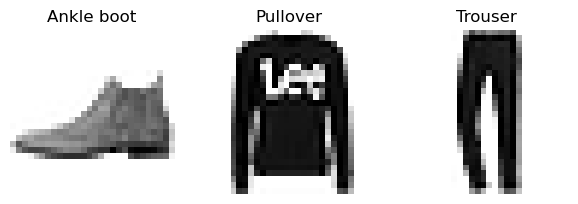

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap='binary', interpolation='nearest')
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape

(11610, 8)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 603us/step - loss: 0.7978 - val_loss: 0.8407
Epoch 2/20
363/363 [==============================] - 0s 484us/step - loss: 0.4761 - val_loss: 0.7657
Epoch 3/20
363/363 [==============================] - 0s 470us/step - loss: 0.4331 - val_loss: 3.5681
Epoch 4/20
363/363 [==============================] - 0s 524us/step - loss: 0.4327 - val_loss: 1.6670
Epoch 5/20
363/363 [==============================] - 0s 465us/step - loss: 0.4119 - val_loss: 0.3654
Epoch 6/20
363/363 [==============================] - 0s 459us/step - loss: 0.3946 - val_loss: 0.3808
Epoch 7/20
363/363 [==============================] - 0s 496us/step - loss: 0.3955 - val_loss: 0.3757
Epoch 8/20
363/363 [==============================] - 0s 464us/step - loss: 0.3875 - val_loss: 0.3806
Epoch 9/20
363/363 [==============================] - 0s 467us/step - loss: 0.3827 - val_loss: 0.3839
Epoch 10/20
363/363 [==============================] - 0s 482us/step - loss: 0.380

In [ ]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 22ms/step


(0.0, 1.0)

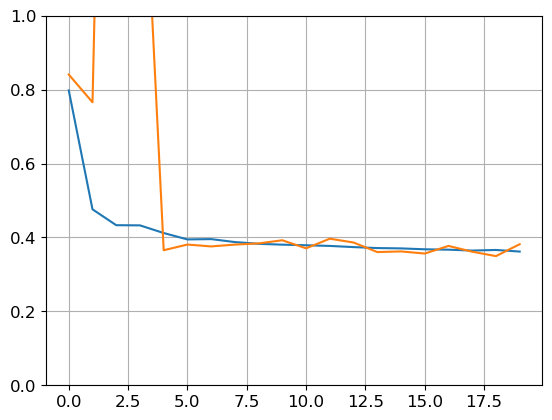

In [ ]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)

In [ ]:
y_pred

array([[0.8006522],
       [1.6973324],
       [4.0895023]], dtype=float32)

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='output')(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 0s 669us/step - loss: 0.7177 - val_loss: 0.8412
Epoch 2/20
363/363 [==============================] - 0s 537us/step - loss: 0.4693 - val_loss: 5.1610
Epoch 3/20
363/363 [==============================] - 0s 526us/step - loss: 0.5064 - val_loss: 0.3951
Epoch 4/20
363/363 [==============================] - 0s 524us/step - loss: 0.4205 - val_loss: 0.4769
Epoch 5/20
363/363 [==============================] - 0s 519us/step - loss: 0.4148 - val_loss: 0.5160
Epoch 6/20
363/363 [==============================] - 0s 521us/step - loss: 0.4040 - val_loss: 1.0676
Epoch 7/20
363/363 [==============================] - 0s 523us/step - loss: 0.4269 - val_loss: 2.1169
Epoch 8/20
363/363 [==============================] - 0s 576us/step - loss: 0.4067 - val_loss: 0.6552
Epoch 9/20
363/363 [==============================] - 0s 517us/step - loss: 0.3896 - val_loss: 0.3729
Epoch 10/20
363/363 [==============================] - 0s 534us/step - loss: 0.384

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
input_A = keras.layers.Input(shape=[5], name='wide_input')
input_B = keras.layers.Input(shape=[6], name='deep_input')
hidden1 = keras.layers.Dense(30, activation='relu')(input_B)
hidden2 = keras.layers.Dense(30, activation='relu')(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name='main_output')(concat)
aux_output = keras.layers.Dense(1, name='aux_output')(hidden2)
model = keras.models.Model(inputs=[input_A, input_B],
                           outputs=[output, aux_output])

In [ ]:
model.compile(loss=['mse', 'mse'], loss_weights=[0.9, 0.1], optimizer=tf.keras.optimizers.legacy.SGD(learning_rate=1e-3))

In [ ]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 0s 832us/step - loss: 2.7573 - main_output_loss: 2.5035 - aux_output_loss: 5.0414 - val_loss: 1.9121 - val_main_output_loss: 1.3162 - val_aux_output_loss: 7.2754
Epoch 2/20
363/363 [==============================] - 0s 564us/step - loss: 1.0219 - main_output_loss: 0.7928 - aux_output_loss: 3.0840 - val_loss: 0.9801 - val_main_output_loss: 0.7217 - val_aux_output_loss: 3.3055
Epoch 3/20
363/363 [==============================] - 0s 544us/step - loss: 0.8080 - main_output_loss: 0.6640 - aux_output_loss: 2.1040 - val_loss: 0.7861 - val_main_output_loss: 0.6504 - val_aux_output_loss: 2.0073
Epoch 4/20
363/363 [==============================] - 0s 532us/step - loss: 0.7235 - main_output_loss: 0.6182 - aux_output_loss: 1.6719 - val_loss: 0.6764 - val_main_output_loss: 0.5806 - val_aux_output_loss: 1.5391
Epoch 5/20
363/363 [==============================] - 0s 584us/step - loss: 0.6776 - main_output_loss: 0.5898 - aux_output_loss: 1.4679 

In [ ]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

1/1 [==============================] - 0s 29ms/step


In [ ]:
total_loss

0.47859930992126465

In [ ]:
main_loss

0.4284015893936157

In [ ]:
aux_loss

0.930379331111908

In [ ]:
y_pred_main

array([[0.46436563],
       [1.9782717 ],
       [3.386218  ]], dtype=float32)

In [ ]:
y_pred_aux

array([[1.170903 ],
       [1.8521001],
       [2.387524 ]], dtype=float32)

In [ ]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [ ]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 0s 783us/step - loss: 0.9843 - output_1_loss: 0.8537 - output_2_loss: 2.1594 - val_loss: 1.3819 - val_output_1_loss: 1.3713 - val_output_2_loss: 1.4778
Epoch 2/10
363/363 [==============================] - 0s 592us/step - loss: 0.5785 - output_1_loss: 0.5207 - output_2_loss: 1.0991 - val_loss: 1.8000 - val_output_1_loss: 1.8263 - val_output_2_loss: 1.5631
Epoch 3/10
363/363 [==============================] - 0s 569us/step - loss: 0.5148 - output_1_loss: 0.4750 - output_2_loss: 0.8731 - val_loss: 2.3825 - val_output_1_loss: 2.4601 - val_output_2_loss: 1.6844
Epoch 4/10
363/363 [==============================] - 0s 570us/step - loss: 0.4650 - output_1_loss: 0.4332 - output_2_loss: 0.7512 - val_loss: 2.8149 - val_output_1_loss: 2.8928 - val_output_2_loss: 2.1137
Epoch 5/10
363/363 [==============================] - 0s 557us/step - loss: 0.4530 - output_1_loss: 0.4293 - output_2_loss: 0.6663 - val_loss: 3.3786 - val_output_1_loss: 3.254

1/1 [==============================] - 0s 30ms/step


In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=[8]),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 631us/step - loss: 1.8535 - val_loss: 1.7213
Epoch 2/10
363/363 [==============================] - 0s 488us/step - loss: 0.7131 - val_loss: 0.6929
Epoch 3/10
363/363 [==============================] - 0s 497us/step - loss: 0.6328 - val_loss: 0.5888
Epoch 4/10
363/363 [==============================] - 0s 492us/step - loss: 0.5940 - val_loss: 0.5598
Epoch 5/10
363/363 [==============================] - 0s 558us/step - loss: 0.5642 - val_loss: 0.5306
Epoch 6/10
363/363 [==============================] - 0s 490us/step - loss: 0.5393 - val_loss: 0.5095
Epoch 7/10
363/363 [==============================] - 0s 492us/step - loss: 0.5186 - val_loss: 0.4953
Epoch 8/10
363/363 [==============================] - 0s 479us/step - loss: 0.5012 - val_loss: 0.4699
Epoch 9/10
363/363 [==============================] - 0s 472us/step - loss: 0.4859 - val_loss: 0.4546
Epoch 10/10
162/162 [==============================] - 0s 302us/step - loss: 0.453

In [ ]:
model.save('my_keras_model.h5')

/Users/taemin/anaconda3/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = keras.models.load_model('my_keras_model.h5')

In [ ]:
model.predict(X_new)

1/1 [==============================] - 0s 24ms/step


array([[0.7462506],
       [1.4894195],
       [3.2154632]], dtype=float32)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_keras_model.h5', save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model('my_keras_model.h5')
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 0s 671us/step - loss: 2.0198 - val_loss: 0.8191
Epoch 2/10
363/363 [==============================] - 0s 512us/step - loss: 0.7176 - val_loss: 0.7391
Epoch 3/10
363/363 [==============================] - 0s 518us/step - loss: 0.6587 - val_loss: 0.6580
Epoch 4/10
363/363 [==============================] - 0s 521us/step - loss: 0.6196 - val_loss: 0.5752
Epoch 5/10
363/363 [==============================] - 0s 565us/step - loss: 0.5882 - val_loss: 0.5449
Epoch 6/10
363/363 [==============================] - 0s 500us/step - loss: 0.5603 - val_loss: 0.5248
Epoch 7/10
363/363 [==============================] - 0s 507us/step - loss: 0.5371 - val_loss: 0.5138
Epoch 8/10
363/363 [==============================] - 0s 500us/step - loss: 0.5165 - val_loss: 0.4785
Epoch 9/10
363/363 [==============================] - 0s 520us/step - loss: 0.4978 - val_loss: 0.4633
Epoch 10/10
162/162 [==============================] - 0s 332us/step - loss: 0.464

In [ ]:
model.compile(loss='mse', optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 0s 636us/step - loss: 0.4682 - val_loss: 0.4346
Epoch 2/100
363/363 [==============================] - 0s 846us/step - loss: 0.4563 - val_loss: 0.4249
Epoch 3/100
363/363 [==============================] - 0s 495us/step - loss: 0.4462 - val_loss: 0.4151
Epoch 4/100
363/363 [==============================] - 0s 476us/step - loss: 0.4370 - val_loss: 0.4163
Epoch 5/100
363/363 [==============================] - 0s 497us/step - loss: 0.4293 - val_loss: 0.4058
Epoch 6/100
363/363 [==============================] - 0s 496us/step - loss: 0.4222 - val_loss: 0.4057
Epoch 7/100
363/363 [==============================] - 0s 507us/step - loss: 0.4163 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 540us/step - loss: 0.4112 - val_loss: 0.3907
Epoch 9/100
363/363 [==============================] - 0s 515us/step - loss: 0.4064 - val_loss: 0.3903
Epoch 10/100
363/363 [==============================] - 0s 550us/step - l

In [ ]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print('\nval/train: {:.2f}'.format(logs['val_loss'] / logs['loss']))

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

253/363 [===================>..........] - ETA: 0s - loss: 0.3724
val/train: 1.03
363/363 [==============================] - 0s 551us/step - loss: 0.3698 - val_loss: 0.3815


In [ ]:
root_logdir = os.path.join(os.curdir, 'my_logs')

In [ ]:
import time

def get_run_logdir():
    run_id = time.strftime('run_%Y_%m_%d-%H-%M-%S')
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2023_08_14-19-49-17'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 0s 685us/step - loss: 0.6383 - val_loss: 4.6221
Epoch 2/30
363/363 [==============================] - 0s 545us/step - loss: 0.4958 - val_loss: 6.5358
Epoch 3/30
363/363 [==============================] - 0s 564us/step - loss: 0.4606 - val_loss: 0.4526
Epoch 4/30
363/363 [==============================] - 0s 547us/step - loss: 0.3892 - val_loss: 0.4542
Epoch 5/30
363/363 [==============================] - 0s 551us/step - loss: 0.3817 - val_loss: 0.4852
Epoch 6/30
363/363 [==============================] - 0s 532us/step - loss: 0.3731 - val_loss: 0.5140
Epoch 7/30
363/363 [==============================] - 0s 559us/step - loss: 0.3678 - val_loss: 0.3355
Epoch 8/30
363/363 [==============================] - 0s 530us/step - loss: 0.3596 - val_loss: 0.3511
Epoch 9/30
363/363 [==============================] - 0s 569us/step - loss: 0.3539 - val_loss: 0.3314
Epoch 10/30
363/363 [==============================] - 0s 594us/step - loss: 0.349

In [ ]:
%load_ext tensorboard

In [ ]:
# %tensorboard --logdir=./my_logs --port=6006

In [ ]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2023_08_14-19-49-23'

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [ ]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30


363/363 [==============================] - 0s 688us/step - loss: 0.7347 - val_loss: 1.1361
Epoch 2/30
363/363 [==============================] - 0s 564us/step - loss: 0.4634 - val_loss: 2.8706
Epoch 3/30
363/363 [==============================] - 0s 547us/step - loss: 0.4741 - val_loss: 3.7226
Epoch 4/30
363/363 [==============================] - 0s 556us/step - loss: 0.3922 - val_loss: 3.1773
Epoch 5/30
363/363 [==============================] - 0s 537us/step - loss: 0.3927 - val_loss: 2.5386
Epoch 6/30
363/363 [==============================] - 0s 518us/step - loss: 0.3828 - val_loss: 0.4098
Epoch 7/30
363/363 [==============================] - 0s 547us/step - loss: 0.3684 - val_loss: 0.3680
Epoch 8/30
363/363 [==============================] - 0s 523us/step - loss: 0.3542 - val_loss: 0.3798
Epoch 9/30
363/363 [==============================] - 0s 527us/step - loss: 0.3480 - val_loss: 0.4117
Epoch 10/30
363/363 [==============================] - 0s 525us/step - loss: 0.3450 - val_los

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for _ in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation='relu'))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss='mse', optimizer=optimizer)
    return model

## 연습문제
### 10

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

(-0.5, 27.5, 27.5, -0.5)

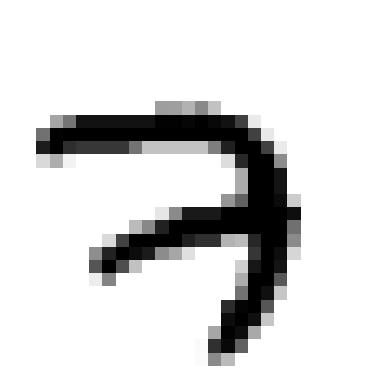

In [ ]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')

In [ ]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [ ]:
X_valid.shape

(5000, 28, 28)

In [ ]:
X_test.shape

(10000, 28, 28)

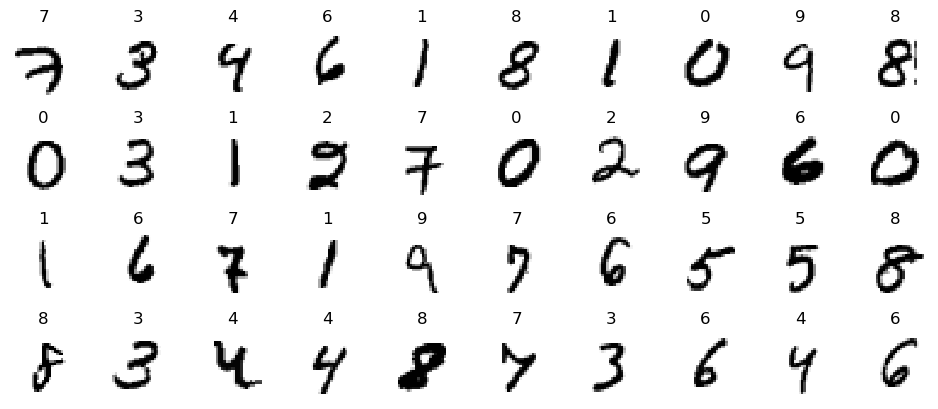

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap='binary', interpolation='nearest')
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)

In [ ]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs['loss'])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=1e-3),
              metrics=['accuracy'])
expon_lr = ExponentialLearningRate(factor=1.005)

In [ ]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 2s 1ms/step - loss: nan - accuracy: 0.5924 - val_loss: nan - val_accuracy: 0.0958


(0.0010000000474974513, 5.2636895179748535, 0.0, 2.323977470397949)

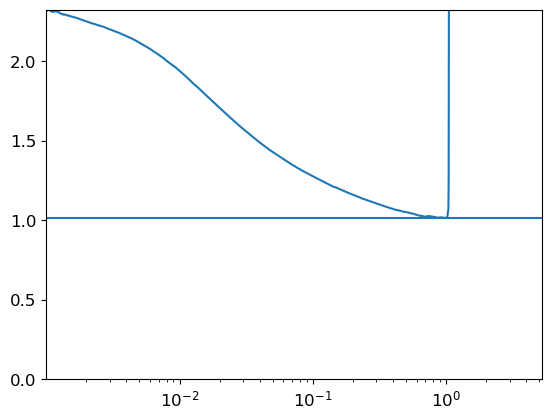

In [ ]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=keras.optimizers.SGD(learning_rate=3e-1),
              metrics=['accuracy'])

In [ ]:
run_index = 1
run_logdir = os.path.join(os.curdir, 'my_mnist_logs', 'run_{:03d}'.format(run_index))
run_logdir

'./my_mnist_logs/run_001'

In [ ]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint('my_mnist_model.h5', save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.2358 - accuracy: 0.9255 - val_loss: 0.1017 - val_accuracy: 0.9706
Epoch 2/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0947 - accuracy: 0.9702 - val_loss: 0.1045 - val_accuracy: 0.9682
Epoch 3/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0675 - accuracy: 0.9781 - val_loss: 0.0720 - val_accuracy: 0.9792
Epoch 4/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0488 - accuracy: 0.9842 - val_loss: 0.0798 - val_accuracy: 0.9804
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0348 - accuracy: 0.9885 - val_loss: 0.0829 - val_accuracy: 0.9770
Epoch 6/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9909 - val_loss: 0.0730 - val_accuracy: 0.9808
Epoch 7/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0215 - accuracy: 0.9932 - val_loss: 0.0933 - val_ac

In [ ]:
model = keras.models.load_model('my_mnist_model.h5')
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 579us/step - loss: 0.0895 - accuracy: 0.9737


[0.08947855234146118, 0.9736999869346619]

In [ ]:
%tensorboard --logdir=./my_mnist_logs --port=6006

Reusing TensorBoard on port 6006 (pid 1711), started 0:01:09 ago. (Use '!kill 1711' to kill it.)